In [1]:
import numpy as np
import scipy.stats as sps
import scipy.optimize as spo
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [2]:
m_true = 10.
c_true = 2.

def linear_model(x, m=m_true, c=c_true):
    return m*x+c

In [3]:
n = 100
min_x, max_x = 0, 100

noise_mean = 0.
noise_std = 50.

x_arr = np.linspace(min_x, max_x, n)
y_truth = linear_model(x_arr)
y_arr = y_truth+sps.norm.rvs(loc=noise_mean, scale=noise_std, size=n) # add some noise

In [4]:
def closed_form_least_sq(A, y, y_err):
    '''
    Function to return least-square estimates of target variable.
    Assumes uncorrelated measurements, {y_i}.

    A: (n x m) matrix, where n is the number of measurements, m is the number of parameters
    y: (n x 1) array of target/dependent variables
    y_err: (n x 1) array of errors associated with each y_i
    
    returns
    Least-square estimate, y_hat
    '''
    v_inv = np.diag(1./y_err**2)

    tmp = np.linalg.inv(A.transpose() @ v_inv @ A)
    tmp2 = A @ tmp @ A.transpose() @ v_inv
    
    return tmp2 @ y

In [5]:
x_mat = np.array([np.ones_like(x_arr), x_arr]).transpose() # nx2, the A matrix in the lectures
y_hat = closed_form_least_sq(x_mat, y_arr, noise_std*np.ones_like(y_arr))

In [6]:
def least_square_loss(param):
    '''
    Loss function to stick into scipy minimizer.

    param: (m, c), array of parameters for linear model, y=mx+c

    returns
    chi2 for model
    '''
    y_hat = linear_model(x_arr, m=param[0], c=param[1])
    return np.sum(((y_arr-y_hat)/noise_std)**2.)

In [7]:
res = spo.minimize(least_square_loss,
                   x0 = np.array([1, 1]))
y_hat_spo = linear_model(x_arr, *res.x)

In [8]:
res.x

array([9.85935971, 5.28958116])

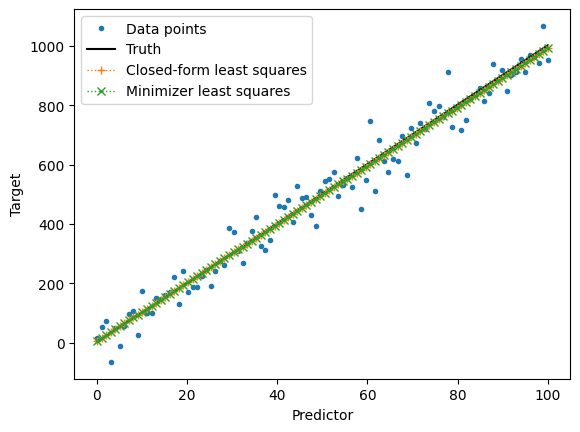

In [9]:
plt.plot(x_arr, y_arr, '.', label='Data points')
plt.plot(x_arr, y_truth, c='k', label='Truth')
plt.plot(x_arr, y_hat, '+:', lw=1, label='Closed-form least squares')
plt.plot(x_arr, y_hat_spo, 'x:', lw=1, label='Minimizer least squares')
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.legend()

In [10]:
p = 364/365
a = 1-99.95/100
k = np.log(a)/np.log(p)
k

np.float64(2770.5272087559356)

In [11]:
(2+np.sqrt(1+8*k))/2.

np.float64(75.4399383228645)

In [15]:
1-((9+3)/39)

0.6923076923076923

/tmp/ipykernel_52430/993716491.py:9: RuntimeWarning: invalid value encountered in scalar divide
  cost[ind_r, ind_b] = (_b/_tot)+(50-_b)/(100-_tot)


Text(0.5, 1.0, 'bowl 1 should have r = 0, b=1')

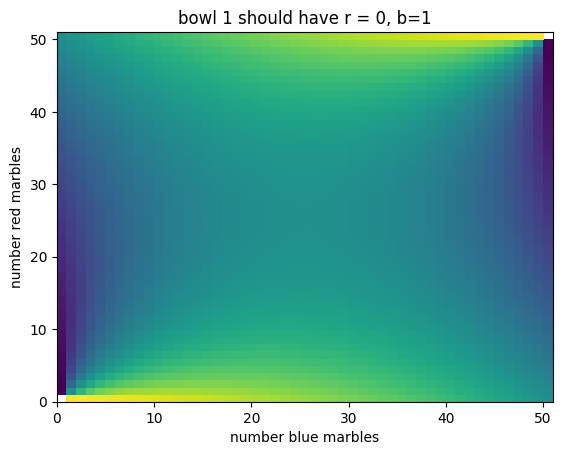

In [39]:
n = 50
b = np.array(range(n+1))
r = np.array(range(n+1))

cost = np.zeros((51, 51))
for ind_r, _r in enumerate(r):
    for ind_b, _b in enumerate(b):
        _tot = _r+_b
        cost[ind_r, ind_b] = (_b/_tot)+(50-_b)/(100-_tot)

idx = np.unravel_index(np.nanargmax(cost), cost.shape)  # (row, col)

plt.pcolor(cost)
plt.xlabel('number blue marbles')
plt.ylabel('number red marbles')
plt.title(f'bowl 1 should have r = {r[idx[0]]}, b={b[idx[1]]}')